<a href="https://colab.research.google.com/github/Susheel06/IITG_SA20_Hackathon/blob/master/IITG_Summer_Analytics_Hackathon_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split as tts
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import pandas.util.testing as tm

In [ ]:
train_data = pd.read_csv('train.csv')
train_data.shape
StandardScaler = StandardScaler()
train_data.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1


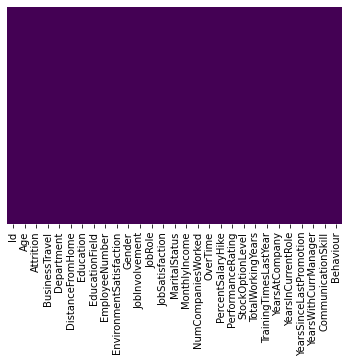

In [ ]:
plt.figure()
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
le = LabelEncoder()

X_train = train_data.drop(['Id',	'EmployeeNumber', 'YearsSinceLastPromotion', 'EducationField', 'StockOptionLevel', 'BusinessTravel'], axis=1)


from sklearn.preprocessing import LabelEncoder
X=X_train
categorical_feature_mask = X.dtypes==object

categorical_cols = X.columns[categorical_feature_mask].tolist()

le = LabelEncoder()
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))+1
X_train = X

X_train.head()

,Age,Attrition,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,CommunicationSkill,Behaviour
0,30,0,2,2,3,3,1,3,3,4,3,2564,0,1,14,3,12,2,11,7,7,4,1
1,36,0,2,12,4,3,1,3,5,3,2,4663,9,2,12,3,7,2,3,2,1,2,1
2,55,1,3,2,1,3,2,3,8,4,3,5160,4,1,16,3,12,3,9,7,3,5,1
3,39,0,2,24,1,1,2,3,7,4,3,4108,7,1,13,3,18,2,7,7,7,4,1
4,37,0,2,3,3,3,2,3,5,3,2,9434,1,1,15,3,10,2,10,7,8,1,1


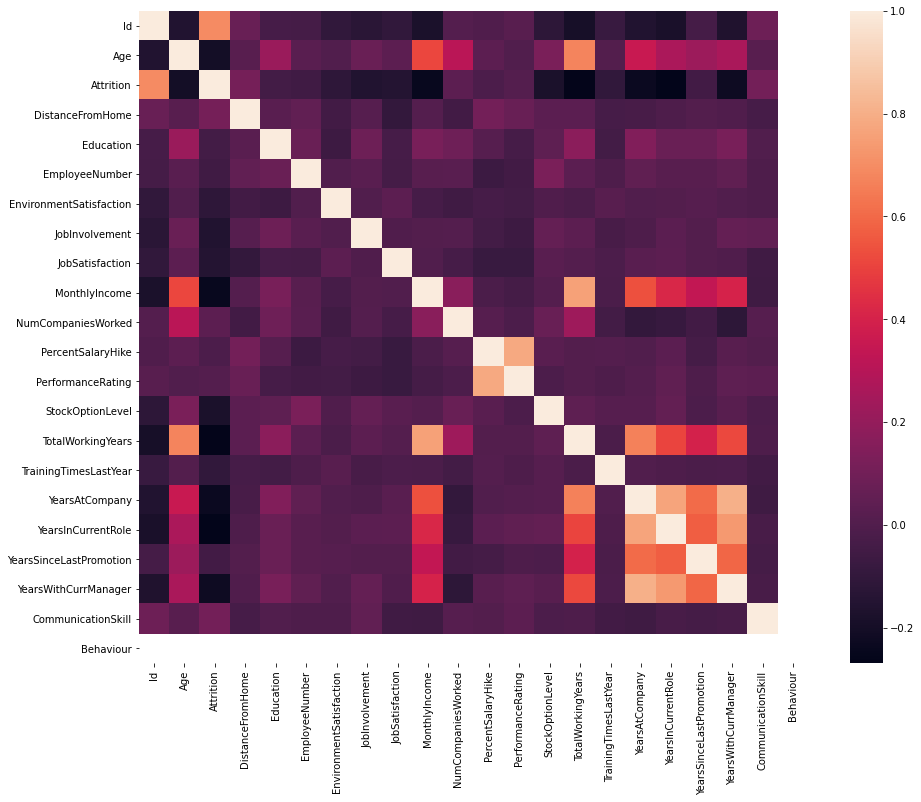

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(train_data.corr())

In [ ]:
Edu_Age_TotalWorking = np.array(X_train['Education'] / (X_train['Age'] + X_train['TotalWorkingYears']))
CurrMgr_Coy = np.array(X_train['YearsWithCurrManager'] / (X_train['YearsAtCompany'] + 1))
CurrRole_CurrMgr = np.array(X_train['YearsInCurrentRole'] / (X_train['YearsWithCurrManager'] + 1))


print(Edu_Age_TotalWorking)
X_train.insert(1,'EAT_working',  Edu_Age_TotalWorking)
X_train.insert(2, 'CM_Coy', CurrMgr_Coy)
X_train.insert(3, 'CR_CM', CurrRole_CurrMgr)

X_train.drop(columns=['Education', 'TotalWorkingYears', 'YearsWithCurrManager', 'YearsAtCompany', 'YearsInCurrentRole'], inplace=True)
X_train.head()

[0.07142857 0.09302326 0.01492537 ... 0.06451613 0.09090909 0.03030303]


,Age,EAT_working,CM_Coy,CR_CM,Attrition,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TrainingTimesLastYear,CommunicationSkill,Behaviour
0,30,0.071429,0.583333,0.875000,0,2,2,3,1,3,3,4,3,2564,0,1,14,3,2,4,1
1,36,0.093023,0.250000,1.000000,0,2,12,3,1,3,5,3,2,4663,9,2,12,3,2,2,1
2,55,0.014925,0.300000,1.750000,1,3,2,3,2,3,8,4,3,5160,4,1,16,3,3,5,1
3,39,0.017544,0.875000,0.875000,0,2,24,1,2,3,7,4,3,4108,7,1,13,3,2,4,1
4,37,0.063830,0.727273,0.777778,0,2,3,3,2,3,5,3,2,9434,1,1,15,3,2,1,1


In [ ]:
X_train.shape

(1628, 21)

In [ ]:
y_train=X_train['Attrition']

X_train.drop(columns=['Attrition'], inplace=True, axis=1)
X_train.head()

,Age,EAT_working,CM_Coy,CR_CM,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TrainingTimesLastYear,CommunicationSkill,Behaviour
0,30,0.071429,0.583333,0.875000,2,2,3,1,3,3,4,3,2564,0,1,14,3,2,4,1
1,36,0.093023,0.250000,1.000000,2,12,3,1,3,5,3,2,4663,9,2,12,3,2,2,1
2,55,0.014925,0.300000,1.750000,3,2,3,2,3,8,4,3,5160,4,1,16,3,3,5,1
3,39,0.017544,0.875000,0.875000,2,24,1,2,3,7,4,3,4108,7,1,13,3,2,4,1
4,37,0.063830,0.727273,0.777778,2,3,3,2,3,5,3,2,9434,1,1,15,3,2,1,1


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X=X_train
y=y_train

print(X.shape)
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=15)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(chi_feature)

X_train = X_train.loc[:, chi_feature]

(1628, 20)
['Age', 'EAT_working', 'CM_Coy', 'CR_CM', 'Department', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'TrainingTimesLastYear', 'CommunicationSkill']


In [ ]:
X_train = pd.DataFrame(data = (X_train+0.1).apply(np.log), columns=X_train.columns)
X_train.head()

,Age,EAT_working,CM_Coy,CR_CM,Department,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TrainingTimesLastYear,CommunicationSkill
0,3.404525,-1.763589,-0.380772,-0.025318,0.741937,0.741937,1.131402,1.131402,1.131402,1.410987,1.131402,7.849363,0.095310,0.741937,1.410987
1,3.586293,-1.644945,-1.049822,0.095310,0.741937,2.493205,1.131402,1.131402,1.629241,1.131402,0.741937,8.447436,0.741937,0.741937,0.741937
2,4.009150,-2.163472,-0.916291,0.615186,1.131402,0.741937,1.131402,1.131402,2.091864,1.410987,1.131402,8.548711,0.095310,1.131402,1.629241
3,3.666122,-2.140944,-0.025318,-0.025318,0.741937,3.182212,0.095310,1.131402,1.960095,1.410987,1.131402,8.320716,0.095310,0.741937,1.410987
4,3.613617,-1.808927,-0.189621,-0.130362,0.741937,1.131402,1.131402,1.131402,1.629241,1.131402,0.741937,9.152086,0.095310,0.741937,0.095310


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)

X_train.shape

(1628, 15)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


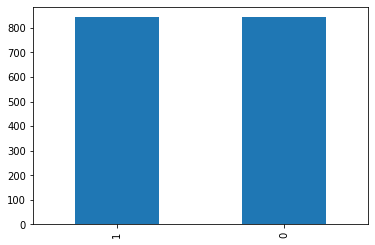

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 1)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

pd.Series(y_train).value_counts().plot.bar()

In [ ]:
X_train.shape

(1686, 15)

In [ ]:
from sklearn.model_selection import train_test_split as tts

X_train, X_validation, y_train, y_validation = tts(X_train, y_train, test_size=0.2, train_size=0.8)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)

(1348, 15)
(1348,)
(338, 15)
(338,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 1, max_depth = 9, n_estimators = 1500, min_samples_split = 2, min_samples_leaf = 1)
model = model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

Y_predict_training = model.predict(X_train)
print(roc_auc_score(y_train, Y_predict_training))

0.9977722597914906


In [ ]:
Y_predict_validation = model.predict(X_validation)
from sklearn.metrics import accuracy_score
print(roc_auc_score(y_validation, Y_predict_validation))

0.9763280456630599


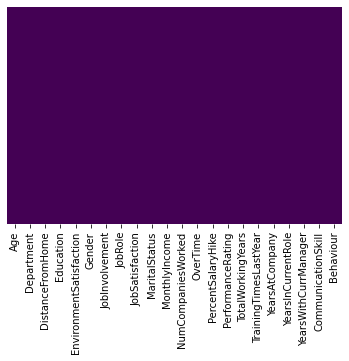

In [ ]:
import seaborn as sns
test_data = pd.read_csv('test.csv')
ID_test = test_data.Id

test_data.drop(['Id',	'EmployeeNumber', 'YearsSinceLastPromotion', 'EducationField', 'StockOptionLevel', 'BusinessTravel'], axis=1, inplace=True)

X_test = test_data

plt.figure()
sns.heatmap(X_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
X=X_test
categorical_feature_mask = X.dtypes==object
categorical_cols = X.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))+1
X_test = X

In [ ]:
Edu_Age_TotalWorking = np.array(X_test['Education'] / (X_test['Age'] + X_test['TotalWorkingYears']))
CurrMgr_Coy = np.array(X_test['YearsWithCurrManager'] / (X_test['YearsAtCompany'] + 1))
CurrRole_CurrMgr = np.array(X_test['YearsInCurrentRole'] / (X_test['YearsWithCurrManager'] + 1))
X_test.insert(1,'EAT_working',  Edu_Age_TotalWorking)
X_test.insert(2, 'CM_Coy', CurrMgr_Coy)
X_test.insert(3, 'CR_CM', CurrRole_CurrMgr)

print(chi_feature)

X_test = X_test.loc[:, chi_feature]
X_test.head()

['Age', 'EAT_working', 'CM_Coy', 'CR_CM', 'Department', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'TrainingTimesLastYear', 'CommunicationSkill']


,Age,EAT_working,CM_Coy,CR_CM,Department,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TrainingTimesLastYear,CommunicationSkill
0,28,0.090909,0.666667,0.400000,2,9,4,3,7,4,2,2070,1,3,5
1,31,0.090909,0.875000,0.875000,3,6,1,4,8,4,1,5460,1,4,3
2,37,0.060000,0.875000,0.875000,2,6,3,4,7,1,1,5974,2,2,4
3,42,0.040000,0.400000,1.000000,2,1,4,2,5,4,2,6062,2,4,5
4,45,0.037037,0.800000,0.777778,2,4,3,3,3,2,2,4447,1,5,2


In [ ]:
X_test = pd.DataFrame(data=(X_test+0.1).apply(np.log), columns=X_test.columns)

min_max_scaler.fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
Y_predict = model.predict_proba(X_test)
Y_predict = Y_predict[:, 1]
Y_predict = pd.DataFrame({'Id': ID_test, 'Attrition': Y_predict})

Y_predict.head(40)

Y_predict.to_csv('Submission_3.csv', index=False, header=True)